In [1]:
# imports :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [2]:
#load the data:

data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# to get statistical for Numerical Columns:
data.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [5]:
# to get statistical for object columns
data.describe(include=["O"])

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod TotalCharges Churn  
count              7043              7043         7043  7043  
unique                2                 4         6531     2  
top                 Yes  Electronic check                 No  
freq               4171              2365           11  5174

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# to gat the different all Types of the data:

for col in data.columns:
    obj_cols=data.select_dtypes("object").columns
    num_cols=data.select_dtypes("number").columns
    disc_cols=data.select_dtypes(include="int64").columns
    cont_cols=data.select_dtypes(include="float64").columns
print(f"object columns ---->> \n {obj_cols}")
print("*"*100)
print(f"Numerical columns ---->> \n {num_cols}")
print("*"*100)
print(f"discrete_cols ----->>> \n {disc_cols}")
print("*"*100)
print(f"Continous Columns ----->>> \n {cont_cols}")

object columns ---->> 
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')
****************************************************************************************************
Numerical columns ---->> 
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')
****************************************************************************************************
discrete_cols ----->>> 
 Index(['SeniorCitizen', 'tenure'], dtype='object')
****************************************************************************************************
Continous Columns ----->>> 
 Index(['MonthlyCharges'], dtype='object')


In [8]:
# check the null values:
data.isna().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [9]:
data["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

<Axes: xlabel='gender'>

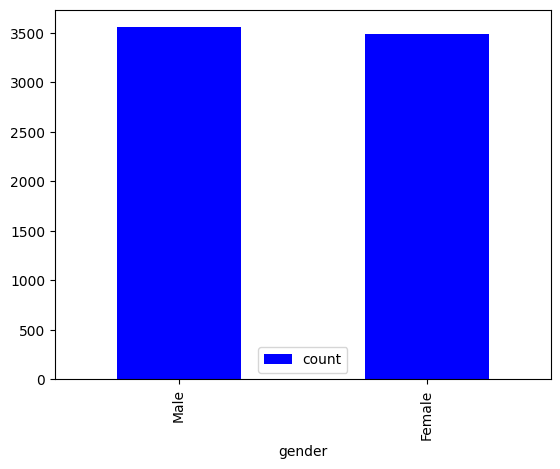

In [10]:
data["gender"].value_counts().plot(kind="bar",legend=True,color="b")

In [11]:
data["PhoneService"].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

<Axes: ylabel='count'>

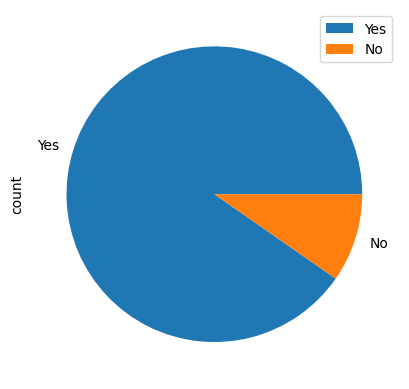

In [12]:
data["PhoneService"].value_counts().plot(kind="pie",legend=True)

<Axes: ylabel='DeviceProtection'>

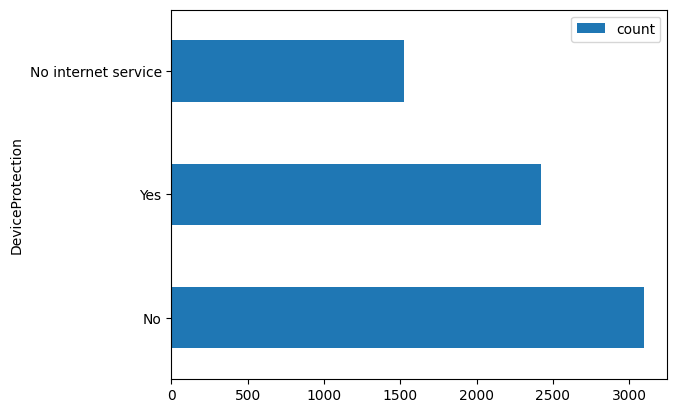

In [13]:
data["DeviceProtection"].value_counts().plot(kind="barh",legend=True)

In [14]:
# cnvert all object data into Numerical data :

label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data.head(10)    

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   
5        6551       0              0        0           0       8   
6        1002       1              0        0           1      22   
7        4770       0              0        0           0      10   
8        5604       0              0        1           0      28   
9        4534       1              0        0           1      62   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   
5             1              2                1               0  ...   
6             1              2                1               0  ...   
7             0              1                0               2  ...   
8             1              2                1               0  ...   
9             1              0                0               2  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   
5                 2            0            2                2         0   
6                 0            0            2                0         0   
7                 0            0            0                0         0   
8                 2            2            2                2         0   
9                 0            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2             142          2505      0  
1                 0              3             498          1466      0  
2                 1              3             436           157      1  
3                 0              0             266          1400      0  
4                 1              2             729           925      1  
5                 1              2            1274          6104      1  
6                 1              1            1075          1550      0  
7                 0              3             140          2609      0  
8                 1              2            1371          2646      1  
9                 0              0             482          3022      0  

[10 rows x 21 columns]

In [15]:
for col in obj_cols :
    print(f"{col} ------ >>> {data[col].value_counts()}")
    print("*"*100)
    

customerID ------ >>> customerID
5375    1
2667    1
4267    1
4222    1
3815    1
       ..
6899    1
1807    1
1063    1
3007    1
2226    1
Name: count, Length: 7043, dtype: int64
****************************************************************************************************
gender ------ >>> gender
1    3555
0    3488
Name: count, dtype: int64
****************************************************************************************************
Partner ------ >>> Partner
0    3641
1    3402
Name: count, dtype: int64
****************************************************************************************************
Dependents ------ >>> Dependents
0    4933
1    2110
Name: count, dtype: int64
****************************************************************************************************
PhoneService ------ >>> PhoneService
1    6361
0     682
Name: count, dtype: int64
****************************************************************************************************
Multip

<Axes: xlabel='gender'>

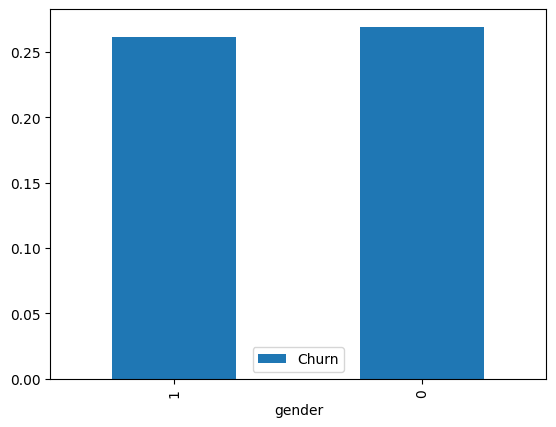

In [16]:
data.groupby(data["gender"])["Churn"].mean().sort_values(ascending=True).plot(kind="bar",legend=True)

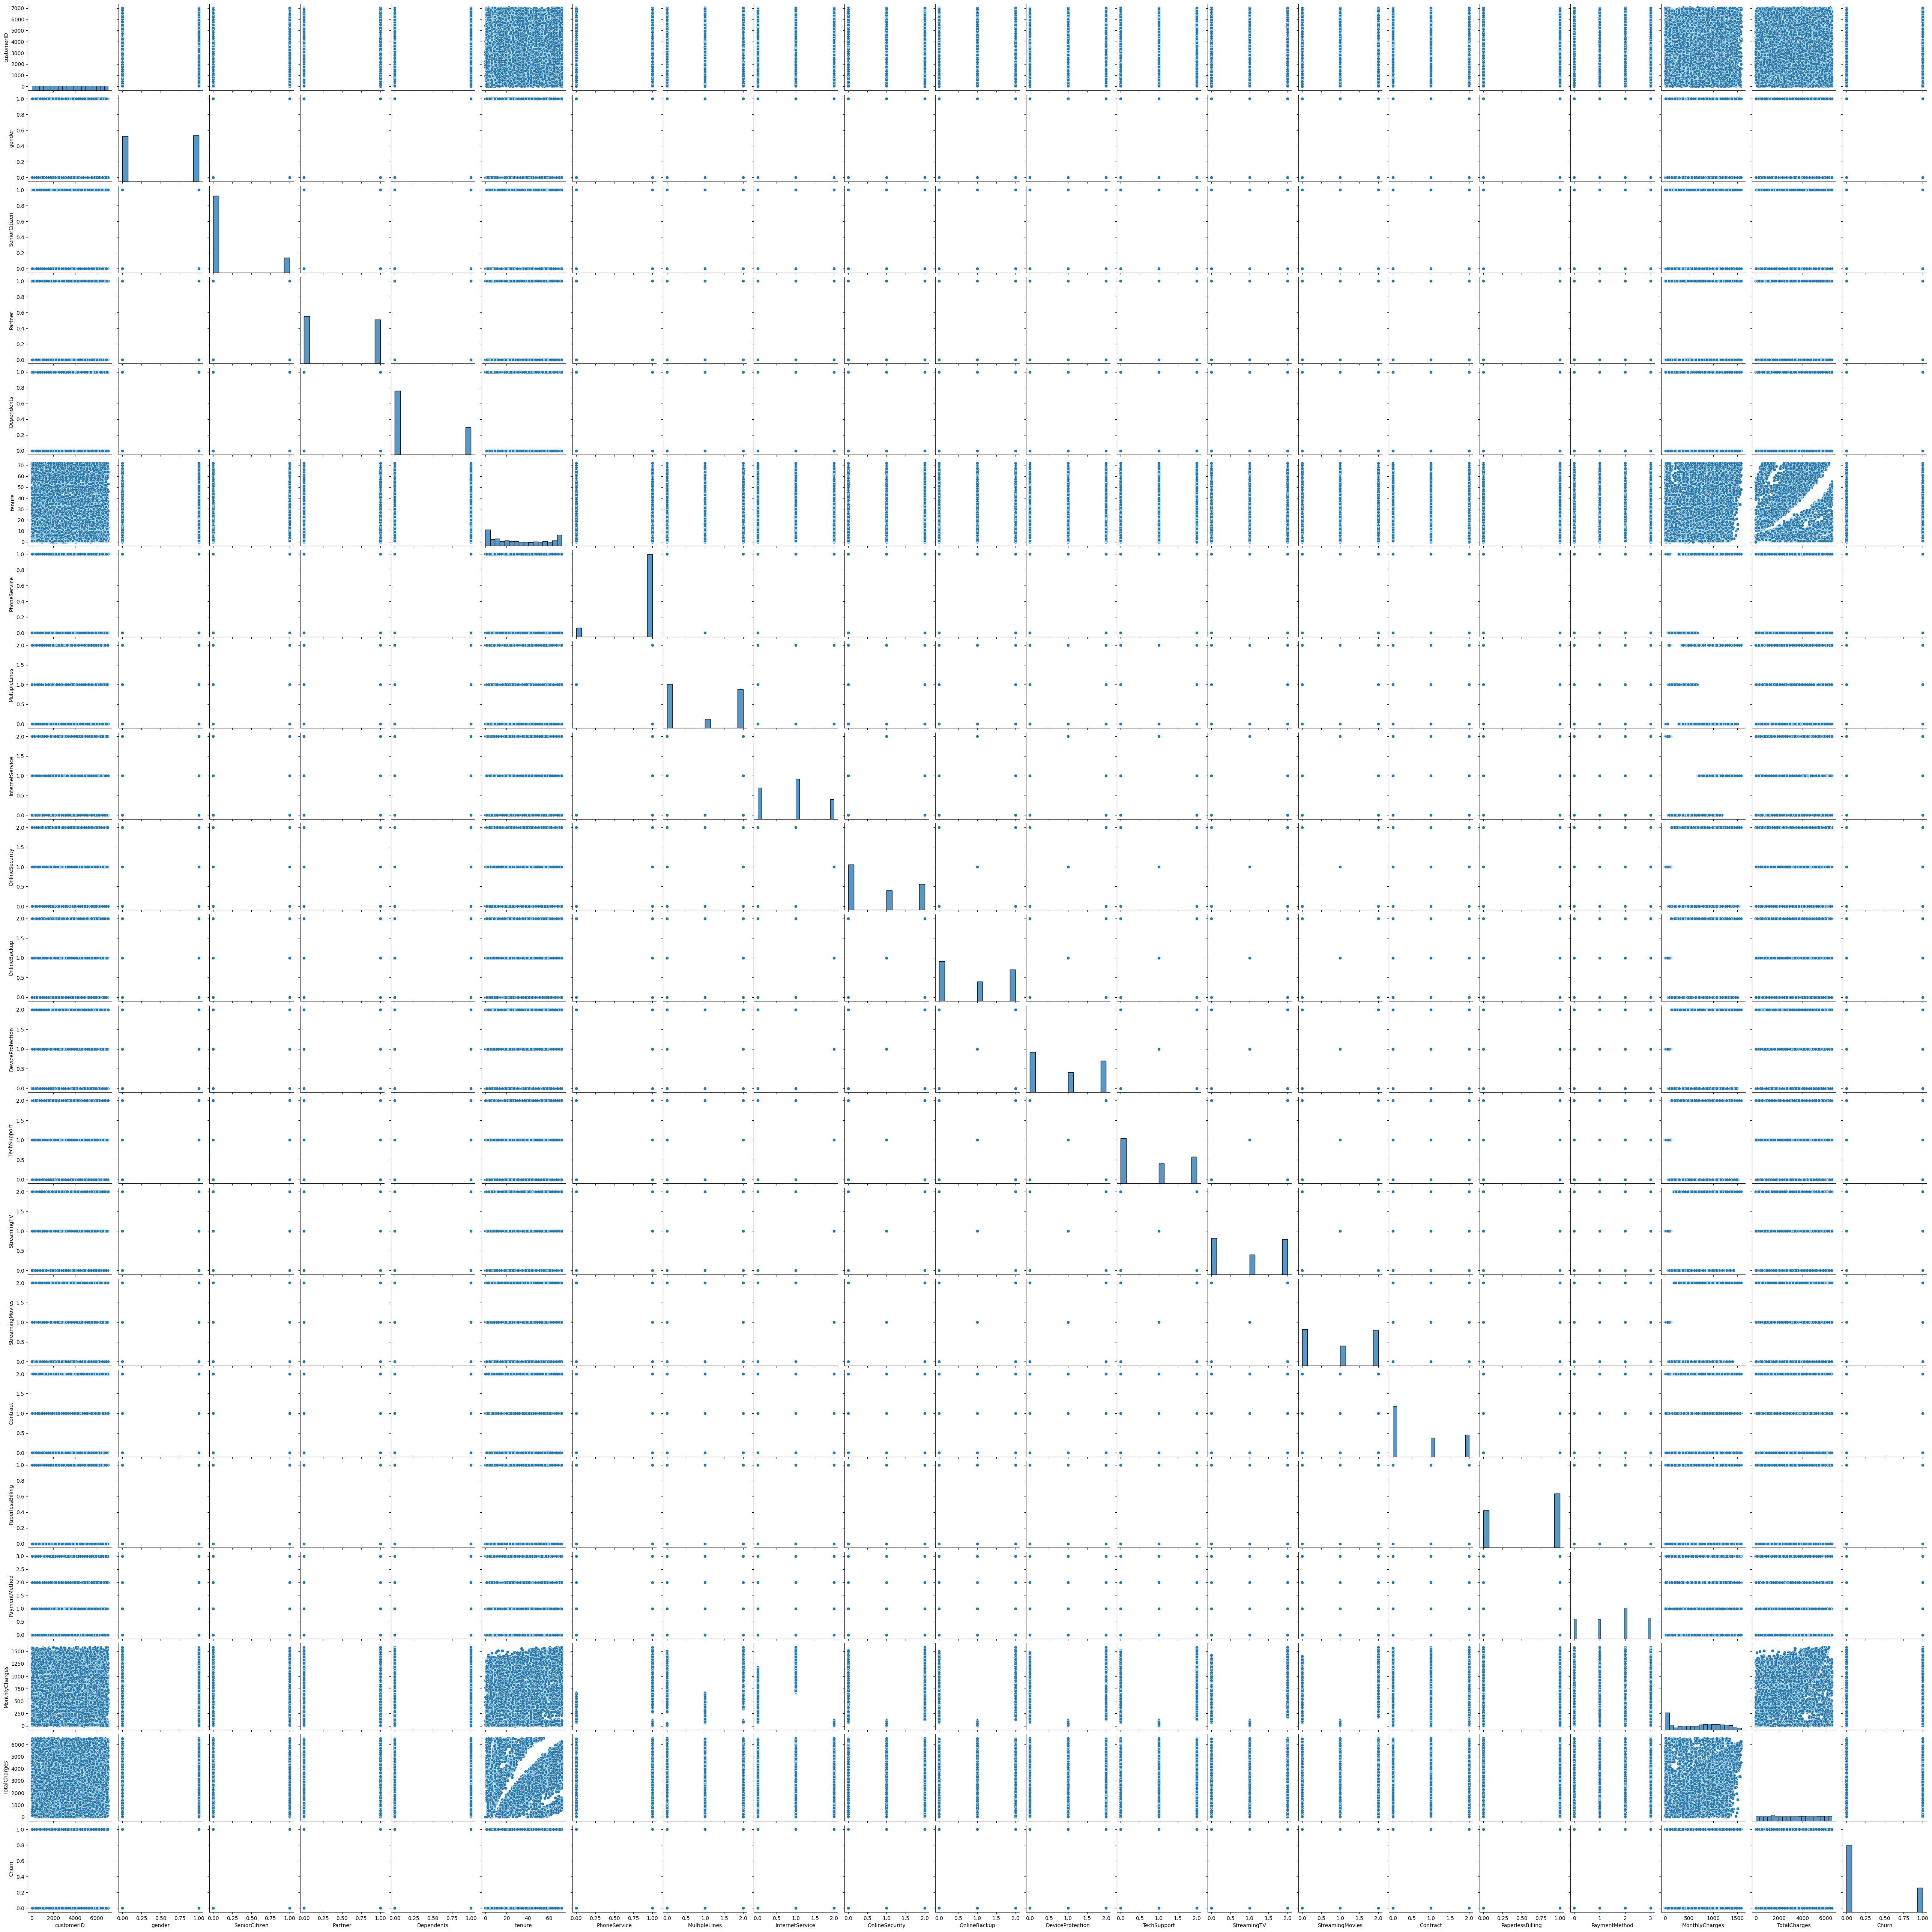

In [17]:
sns.pairplot(data.select_dtypes(include="int64"))

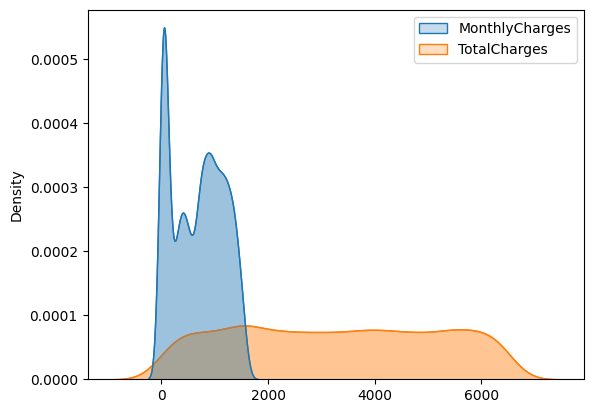

In [18]:
l=["MonthlyCharges","TotalCharges"]
for col in l:
    sns.kdeplot(data[l],fill=True)
    

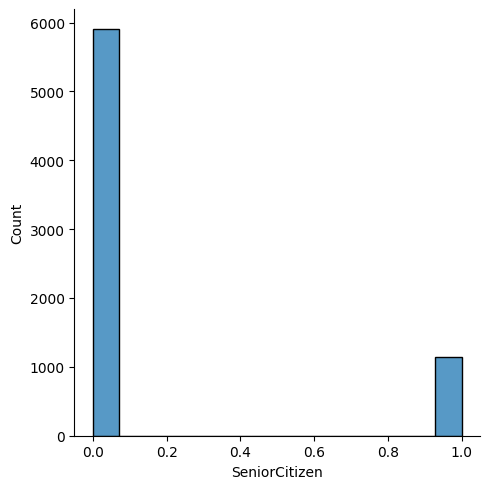

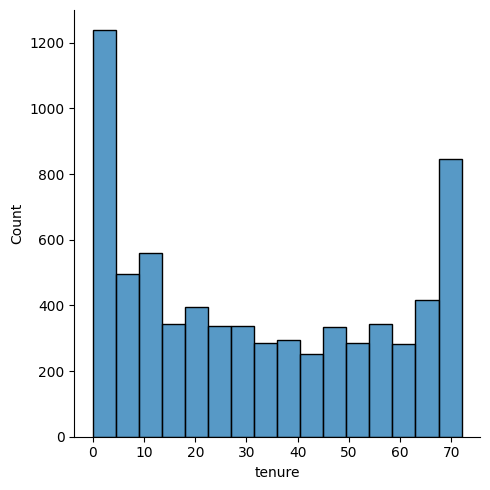

In [19]:
for col in disc_cols:
    sns.displot(data[col])

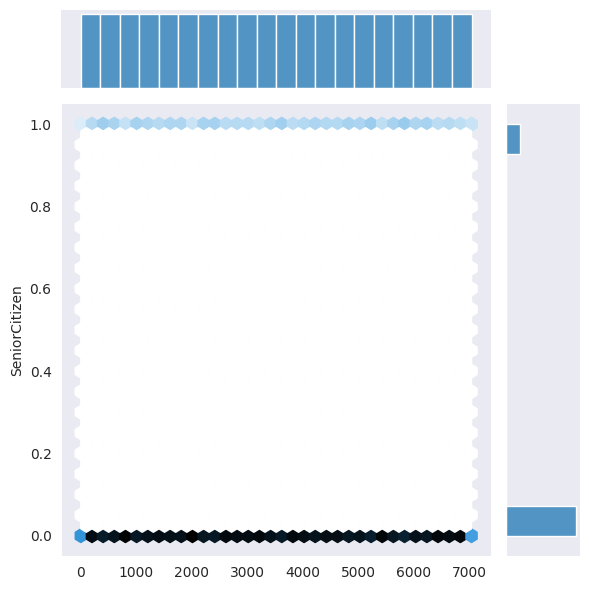

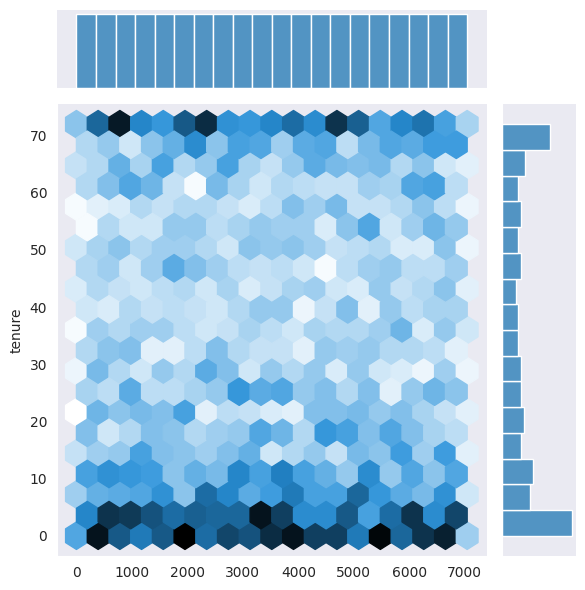

In [20]:
for col in disc_cols:
  with sns.axes_style("dark"):
    sns.jointplot(data[col],kind="hex")

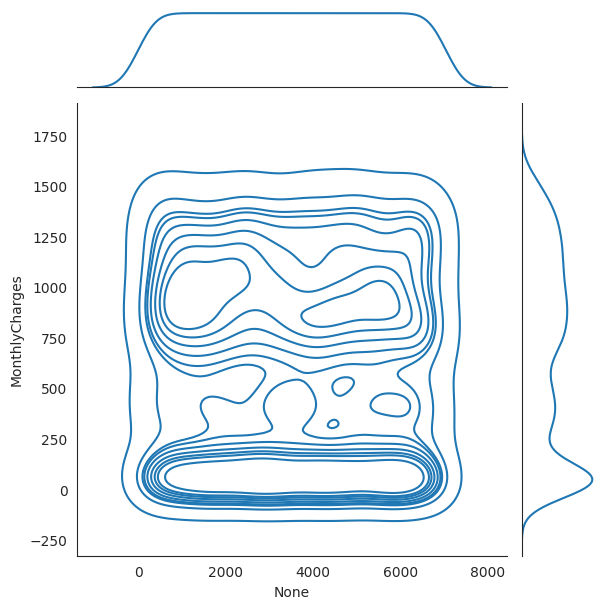

In [21]:
for col in cont_cols :
    with sns.axes_style("white"):
        sns.jointplot(data[col],kind="kde")

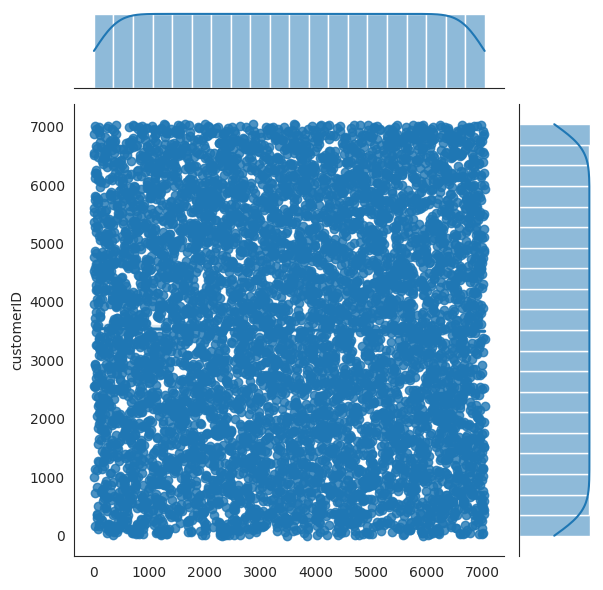

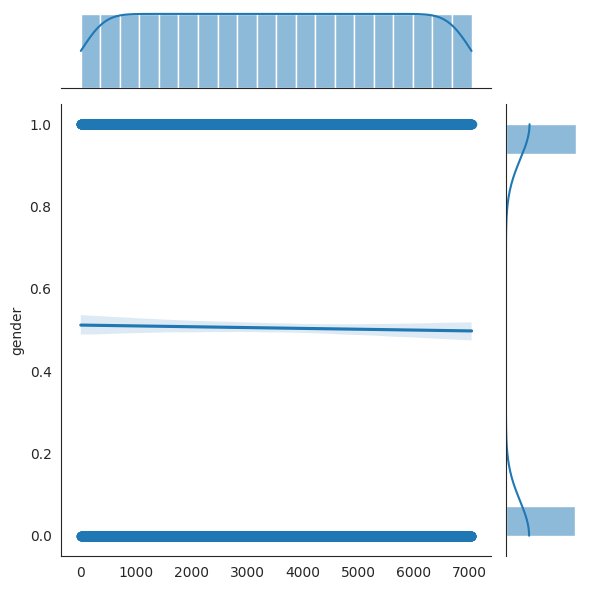

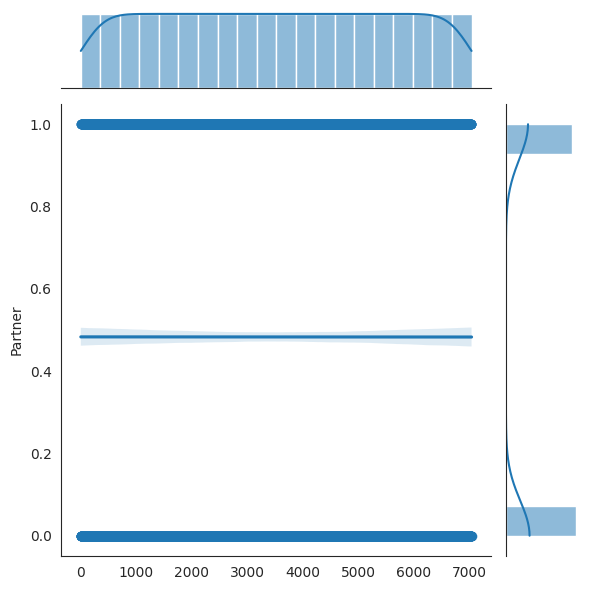

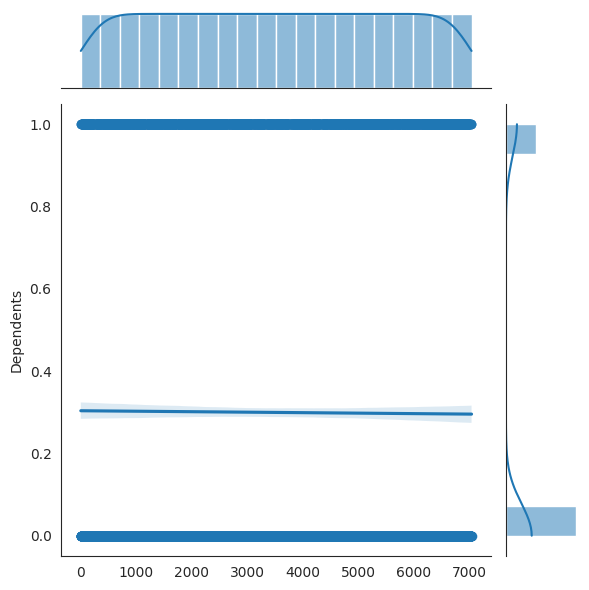

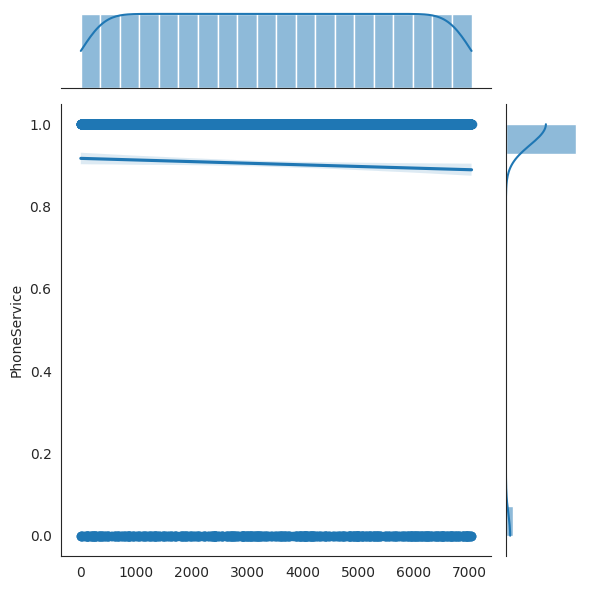

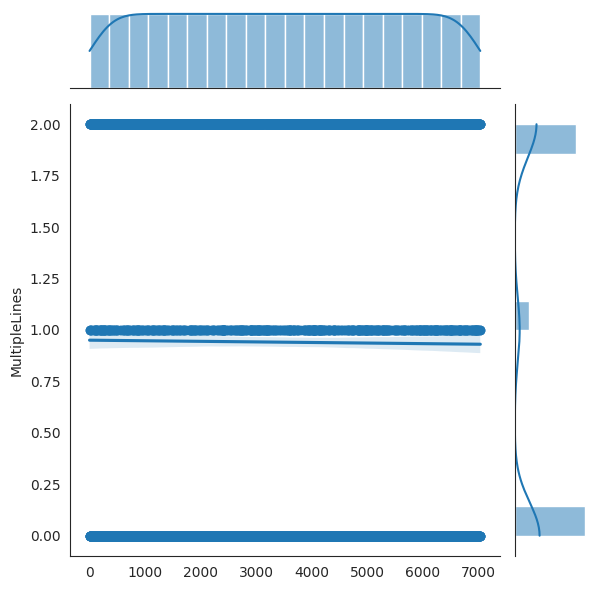

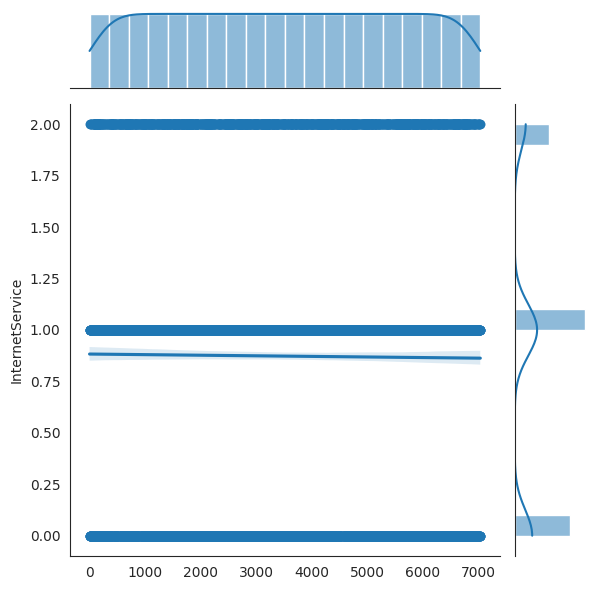

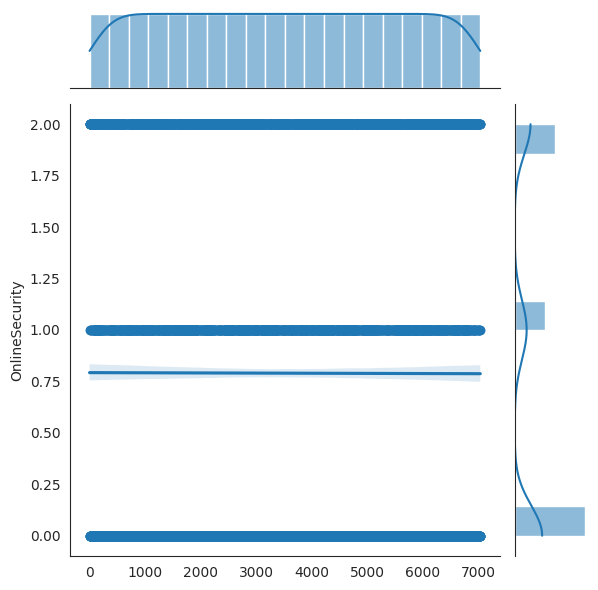

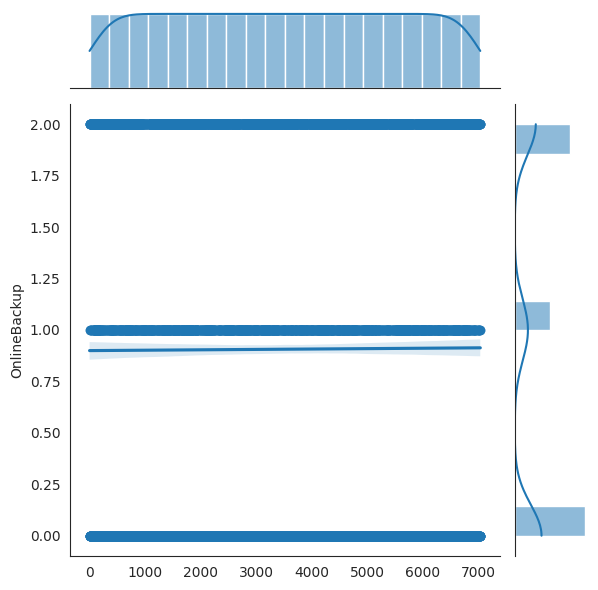

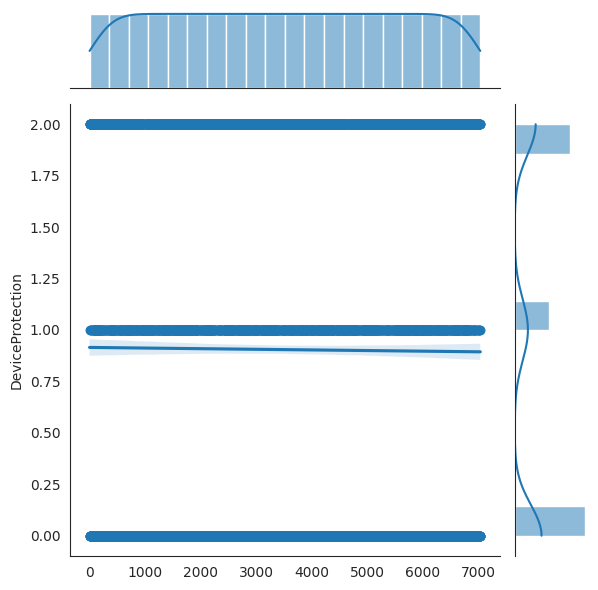

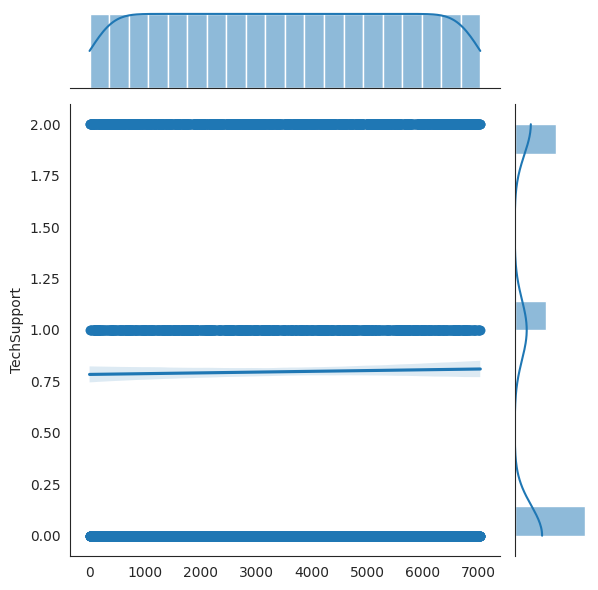

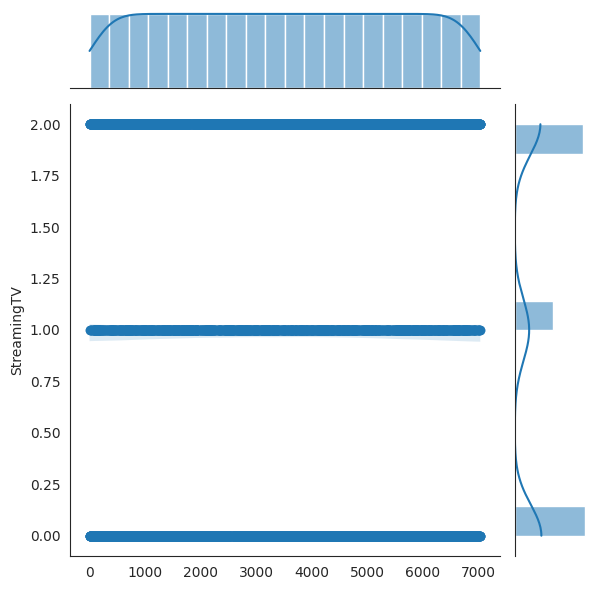

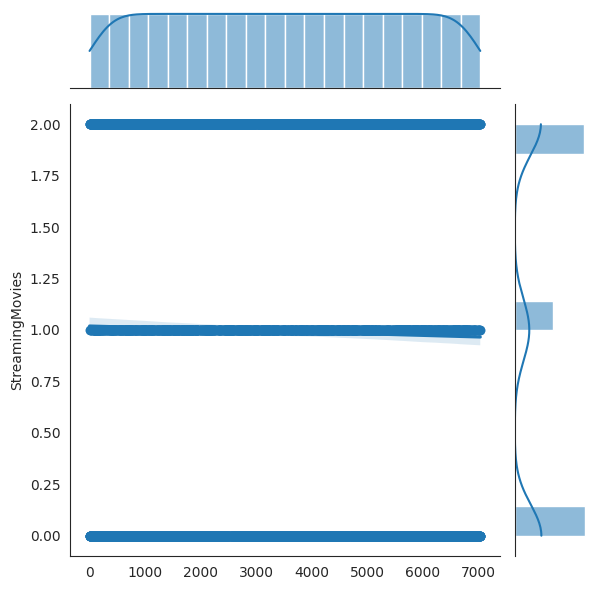

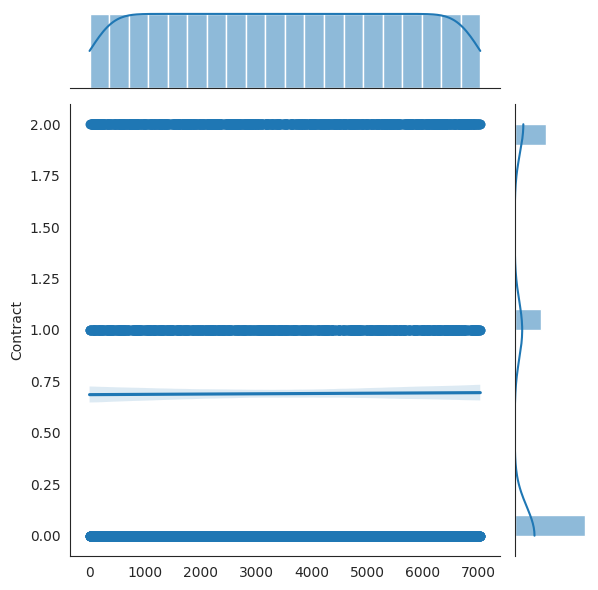

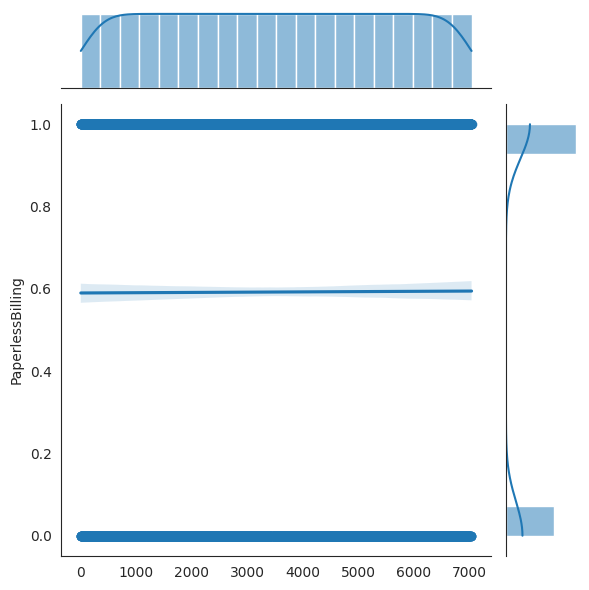

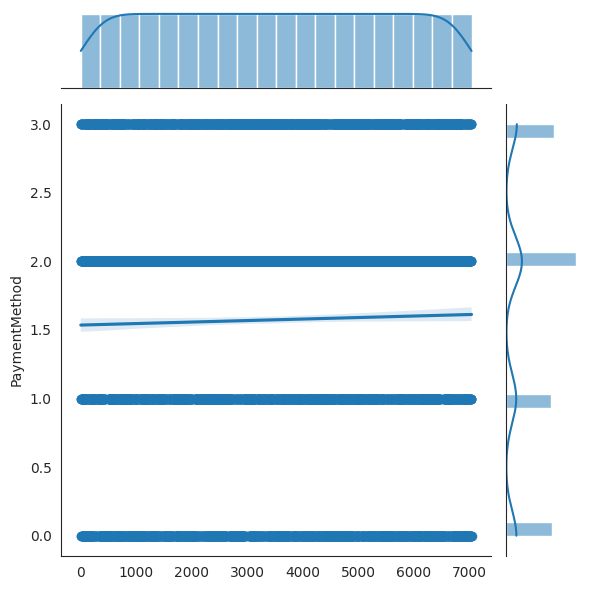

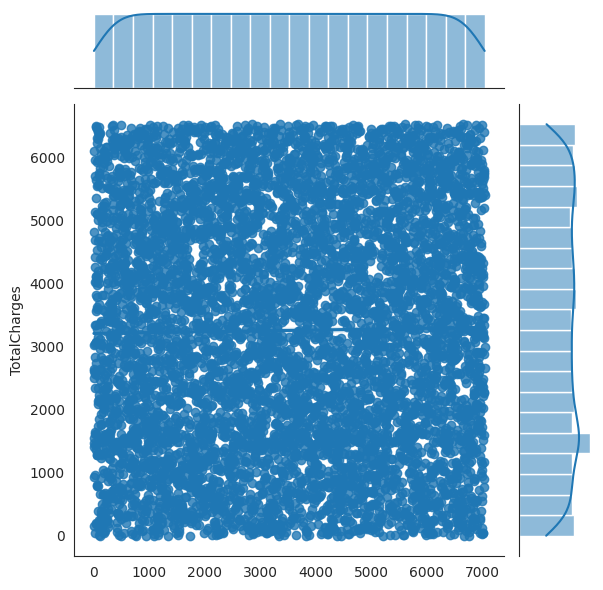

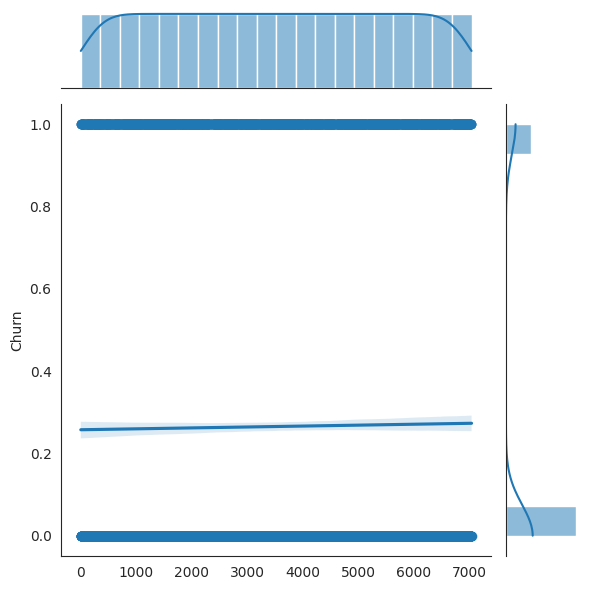

In [22]:
for col in obj_cols :
    with sns.axes_style("white"):
        sns.jointplot(data[col],kind="reg")

In [23]:
# VarianceThreshold :
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))
selector.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [24]:
num_cols=data.select_dtypes("number").columns
num_cols[selector.get_support(indices=True)]


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
class Var_Selector(BaseEstimator,TransformerMixin):
    
    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])
        
        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)
        
        # remove high-low cardinality categorical:-
        
        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index
        
        return data.drop(columns=removed_cols)
        

In [26]:
transform=Var_Selector(data)
transform.fit(data)
transform.transform(data)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0               0  ...   
1                1              0                0               2  ...   
2                1              0                0               2  ...   
3                0              1                0               2  ...   
4                1              0                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              2                0               2  ...   
7039             1              2                1               0  ...   
7040             0              1                0               2  ...   
7041             1              2                1               0  ...   
7042             1              0                1               2  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2             142          2505      0  
1                    0              3             498          1466      0  
2                    1              3             436           157      1  
3                    0              0             266          1400      0  
4                    1              2             729           925      1  
...                ...            ...             ...           ...    ...  
7038                 1              3             991          1597      0  
7039                 1              1            1340          5698      0  
7040                 1              2             137          2994      0  
7041                 1              3             795          2660      1  
7042                 1              0            1388          5407      0  

[7043 rows x 21 columns]

In [27]:
# remove the duplicated values:

df=data.T
duplicated_features=data.duplicated().sum()
duplicated_features

0

In [28]:
data.drop(duplicated_features)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
5           6551       0              0        0           0       8   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
1                1              0                0               2  ...   
2                1              0                0               2  ...   
3                0              1                0               2  ...   
4                1              0                1               0  ...   
5                1              2                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              2                0               2  ...   
7039             1              2                1               0  ...   
7040             0              1                0               2  ...   
7041             1              2                1               0  ...   
7042             1              0                1               2  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
5                    2            0            2                2         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
1                    0              3             498          1466      0  
2                    1              3             436           157      1  
3                    0              0             266          1400      0  
4                    1              2             729           925      1  
5                    1              2            1274          6104      1  
...                ...            ...             ...           ...    ...  
7038                 1              3             991          1597      0  
7039                 1              1            1340          5698      0  
7040                 1              2             137          2994      0  
7041                 1              3             795          2660      1  
7042                 1              0            1388          5407      0  

[7042 rows x 21 columns]

In [29]:
correlation=data.select_dtypes("number").corr()
correlation

customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.006288      -0.002074 -0.026729   -0.012823   
gender              0.006288  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.002074 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.026729 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.012823  0.010517      -0.211185  0.452676    1.000000   
tenure              0.008035  0.005106       0.016567  0.379697    0.159712   
PhoneService       -0.006483 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.004316 -0.006739       0.146185  0.142410   -0.024991   
InternetService    -0.012407 -0.000863      -0.032310  0.000891    0.044590   
OnlineSecurity      0.013292 -0.015017      -0.128221  0.150828    0.152166   
OnlineBackup       -0.003334 -0.012057      -0.013632  0.153130    0.091015   
DeviceProtection   -0.006918  0.000549      -0.021398  0.166330    0.080537   
TechSupport         0.001140 -0.006825      -0.151268  0.126733    0.133524   
StreamingTV        -0.007777 -0.006421       0.030776  0.137341    0.046885   
StreamingMovies    -0.016746 -0.008743       0.047266  0.129574    0.021321   
Contract            0.015028  0.000126      -0.142554  0.294806    0.243187   
PaperlessBilling   -0.001945 -0.011754       0.156530 -0.014877   -0.111377   
PaymentMethod       0.011604  0.017352      -0.038551 -0.154798   -0.040292   
MonthlyCharges     -0.006266 -0.014623       0.219524  0.106501   -0.107507   
TotalCharges        0.003027 -0.005291       0.037653  0.059568   -0.009572   
Churn              -0.017447 -0.008612       0.150889 -0.150448   -0.164221   

                    tenure  PhoneService  MultipleLines  InternetService  \
customerID        0.008035     -0.006483       0.004316        -0.012407   
gender            0.005106     -0.006488      -0.006739        -0.000863   
SeniorCitizen     0.016567      0.008576       0.146185        -0.032310   
Partner           0.379697      0.017706       0.142410         0.000891   
Dependents        0.159712     -0.001762      -0.024991         0.044590   
tenure            1.000000      0.008448       0.343032        -0.030359   
PhoneService      0.008448      1.000000      -0.020538         0.387436   
MultipleLines     0.343032     -0.020538       1.000000        -0.109216   
InternetService  -0.030359      0.387436      -0.109216         1.000000   
OnlineSecurity    0.325468     -0.015198       0.007141        -0.028416   
OnlineBackup      0.370876      0.024105       0.117327         0.036138   
DeviceProtection  0.371105      0.003727       0.122318         0.044944   
TechSupport       0.322942     -0.019158       0.011466        -0.026047   
StreamingTV       0.289373      0.055353       0.175059         0.107417   
StreamingMovies   0.296866      0.043870       0.180957         0.098350   
Contract          0.671607      0.002247       0.110842         0.099721   
PaperlessBilling  0.006152      0.016505       0.165146        -0.138625   
PaymentMethod    -0.370436     -0.004184      -0.176793         0.086140   
MonthlyCharges    0.268133      0.271209       0.444580        -0.244965   
TotalCharges      0.158523      0.083195       0.114955        -0.055724   
Churn            -0.352229      0.011942       0.038037        -0.047291   

                  OnlineSecurity  ...  DeviceProtection  TechSupport  \
customerID              0.013292  ...         -0.006918     0.001140   
gender                 -0.015017  ...          0.000549    -0.006825   
SeniorCitizen          -0.128221  ...         -0.021398    -0.151268   
Partner                 0.150828  ...          0.166330     0.126733   
Dependents              0.152166  ...          0.080537     0.133524   
tenure                  0.325468  ...          0.371105     0.322942   
PhoneService           -0.015198  ...          0.003727    -0.019158   
MultipleLines           0.0071

In [30]:
kendall_corr=data.select_dtypes("number").corr(method="kendall")
kendall_corr

customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.005134      -0.001694 -0.021826   -0.010471   
gender              0.005134  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.001694 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.021826 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.010471  0.010517      -0.211185  0.452676    1.000000   
tenure              0.006223  0.002877       0.015315  0.317714    0.135506   
PhoneService       -0.005294 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.003479 -0.006398       0.140942  0.137150   -0.024090   
InternetService    -0.009880 -0.001438      -0.016075  0.000853    0.032572   
OnlineSecurity      0.009750 -0.013593      -0.134195  0.141259    0.153289   
OnlineBackup       -0.002728 -0.011189      -0.019101  0.144740    0.090772   
DeviceProtection   -0.005587  0.000728      -0.026571  0.157200    0.080965   
TechSupport         0.000477 -0.005944      -0.155392  0.118794    0.135558   
StreamingTV        -0.006081 -0.006050       0.028180  0.130082    0.045147   
StreamingMovies    -0.012991 -0.008265       0.044270  0.122729    0.020576   
Contract            0.011392  0.001042      -0.136998  0.281830    0.232493   
PaperlessBilling   -0.001588 -0.011754       0.156530 -0.014877   -0.111377   
PaymentMethod       0.008069  0.015665      -0.039990 -0.142057   -0.034396   
MonthlyCharges     -0.003828 -0.011224       0.180636  0.088626   -0.087439   
TotalCharges        0.002052 -0.004176       0.030909  0.048134   -0.008066   
Churn              -0.014247 -0.008612       0.150889 -0.150448   -0.164221   

                    tenure  PhoneService  MultipleLines  InternetService  \
customerID        0.006223     -0.005294       0.003479        -0.009880   
gender            0.002877     -0.006488      -0.006398        -0.001438   
SeniorCitizen     0.015315      0.008576       0.140942        -0.016075   
Partner           0.317714      0.017706       0.137150         0.000853   
Dependents        0.135506     -0.001762      -0.024090         0.032572   
tenure            1.000000      0.007002       0.277927        -0.022428   
PhoneService      0.007002      1.000000      -0.036142         0.379372   
MultipleLines     0.277927     -0.036142       1.000000        -0.077243   
InternetService  -0.022428      0.379372      -0.077243         1.000000   
OnlineSecurity    0.249201     -0.000895      -0.013690         0.040448   
OnlineBackup      0.286902      0.028640       0.095352         0.056215   
DeviceProtection  0.289533      0.009506       0.100405         0.063781   
TechSupport       0.248239     -0.005082      -0.008965         0.040099   
StreamingTV       0.229303      0.053339       0.153971         0.089610   
StreamingMovies   0.235361      0.042021       0.160408         0.080326   
Contract          0.545823      0.001754       0.098453         0.070833   
PaperlessBilling  0.006351      0.016505       0.159112        -0.111764   
PaymentMethod    -0.287716     -0.003484      -0.161481         0.075853   
MonthlyCharges    0.190565      0.195863       0.365218        -0.088426   
TotalCharges      0.114980      0.066905       0.090035        -0.029487   
Churn            -0.302965      0.011942       0.036514        -0.027187   

                  OnlineSecurity  ...  DeviceProtection  TechSupport  \
customerID              0.009750  ...         -0.005587     0.000477   
gender                 -0.013593  ...          0.000728    -0.005944   
SeniorCitizen          -0.134195  ...         -0.026571    -0.155392   
Partner                 0.141259  ...          0.157200     0.118794   
Dependents              0.153289  ...          0.080965     0.135558   
tenure                  0.249201  ...          0.289533     0.248239   
PhoneService           -0.000895  ...          0.009506    -0.005082   
MultipleLines          -0.0136

In [31]:
pearson_corr=data.select_dtypes("number").corr(method="pearson")
pearson_corr

customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.006288      -0.002074 -0.026729   -0.012823   
gender              0.006288  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.002074 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.026729 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.012823  0.010517      -0.211185  0.452676    1.000000   
tenure              0.008035  0.005106       0.016567  0.379697    0.159712   
PhoneService       -0.006483 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.004316 -0.006739       0.146185  0.142410   -0.024991   
InternetService    -0.012407 -0.000863      -0.032310  0.000891    0.044590   
OnlineSecurity      0.013292 -0.015017      -0.128221  0.150828    0.152166   
OnlineBackup       -0.003334 -0.012057      -0.013632  0.153130    0.091015   
DeviceProtection   -0.006918  0.000549      -0.021398  0.166330    0.080537   
TechSupport         0.001140 -0.006825      -0.151268  0.126733    0.133524   
StreamingTV        -0.007777 -0.006421       0.030776  0.137341    0.046885   
StreamingMovies    -0.016746 -0.008743       0.047266  0.129574    0.021321   
Contract            0.015028  0.000126      -0.142554  0.294806    0.243187   
PaperlessBilling   -0.001945 -0.011754       0.156530 -0.014877   -0.111377   
PaymentMethod       0.011604  0.017352      -0.038551 -0.154798   -0.040292   
MonthlyCharges     -0.006266 -0.014623       0.219524  0.106501   -0.107507   
TotalCharges        0.003027 -0.005291       0.037653  0.059568   -0.009572   
Churn              -0.017447 -0.008612       0.150889 -0.150448   -0.164221   

                    tenure  PhoneService  MultipleLines  InternetService  \
customerID        0.008035     -0.006483       0.004316        -0.012407   
gender            0.005106     -0.006488      -0.006739        -0.000863   
SeniorCitizen     0.016567      0.008576       0.146185        -0.032310   
Partner           0.379697      0.017706       0.142410         0.000891   
Dependents        0.159712     -0.001762      -0.024991         0.044590   
tenure            1.000000      0.008448       0.343032        -0.030359   
PhoneService      0.008448      1.000000      -0.020538         0.387436   
MultipleLines     0.343032     -0.020538       1.000000        -0.109216   
InternetService  -0.030359      0.387436      -0.109216         1.000000   
OnlineSecurity    0.325468     -0.015198       0.007141        -0.028416   
OnlineBackup      0.370876      0.024105       0.117327         0.036138   
DeviceProtection  0.371105      0.003727       0.122318         0.044944   
TechSupport       0.322942     -0.019158       0.011466        -0.026047   
StreamingTV       0.289373      0.055353       0.175059         0.107417   
StreamingMovies   0.296866      0.043870       0.180957         0.098350   
Contract          0.671607      0.002247       0.110842         0.099721   
PaperlessBilling  0.006152      0.016505       0.165146        -0.138625   
PaymentMethod    -0.370436     -0.004184      -0.176793         0.086140   
MonthlyCharges    0.268133      0.271209       0.444580        -0.244965   
TotalCharges      0.158523      0.083195       0.114955        -0.055724   
Churn            -0.352229      0.011942       0.038037        -0.047291   

                  OnlineSecurity  ...  DeviceProtection  TechSupport  \
customerID              0.013292  ...         -0.006918     0.001140   
gender                 -0.015017  ...          0.000549    -0.006825   
SeniorCitizen          -0.128221  ...         -0.021398    -0.151268   
Partner                 0.150828  ...          0.166330     0.126733   
Dependents              0.152166  ...          0.080537     0.133524   
tenure                  0.325468  ...          0.371105     0.322942   
PhoneService           -0.015198  ...          0.003727    -0.019158   
MultipleLines           0.0071

In [32]:
spearman_corr=data.select_dtypes("number").corr(method="spearman")
spearman_corr

customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.006288      -0.002074 -0.026729   -0.012823   
gender              0.006288  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.002074 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.026729 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.012823  0.010517      -0.211185  0.452676    1.000000   
tenure              0.009200  0.003486       0.018556  0.384931    0.164175   
PhoneService       -0.006483 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.004423 -0.006626       0.145968  0.142041   -0.024949   
InternetService    -0.012764 -0.001517      -0.016964  0.000900    0.034373   
OnlineSecurity      0.012612 -0.014319      -0.141363  0.148804    0.161477   
OnlineBackup       -0.003544 -0.011808      -0.020157  0.152746    0.095793   
DeviceProtection   -0.007122  0.000768      -0.028040  0.165893    0.085442   
TechSupport         0.000645 -0.006263      -0.163717  0.125159    0.142820   
StreamingTV        -0.007810 -0.006387       0.029752  0.137336    0.047664   
StreamingMovies    -0.016763 -0.008726       0.046739  0.129573    0.021723   
Contract            0.014662  0.001094      -0.143850  0.295925    0.244120   
PaperlessBilling   -0.001945 -0.011754       0.156530 -0.014877   -0.111377   
PaymentMethod       0.010826  0.017119      -0.043703 -0.155247   -0.037590   
MonthlyCharges     -0.005819 -0.013736       0.221067  0.108463   -0.107011   
TotalCharges        0.003011 -0.005114       0.037852  0.058947   -0.009878   
Churn              -0.017447 -0.008612       0.150889 -0.150448   -0.164221   

                    tenure  PhoneService  MultipleLines  InternetService  \
customerID        0.009200     -0.006483       0.004423        -0.012764   
gender            0.003486     -0.006488      -0.006626        -0.001517   
SeniorCitizen     0.018556      0.008576       0.145968        -0.016964   
Partner           0.384931      0.017706       0.142041         0.000900   
Dependents        0.164175     -0.001762      -0.024949         0.034373   
tenure            1.000000      0.008483       0.348444        -0.028575   
PhoneService      0.008483      1.000000      -0.037431         0.400349   
MultipleLines     0.348444     -0.037431       1.000000        -0.097689   
InternetService  -0.028575      0.400349      -0.097689         1.000000   
OnlineSecurity    0.318672     -0.000943      -0.015199         0.020074   
OnlineBackup      0.367451      0.030224       0.106652         0.060925   
DeviceProtection  0.370751      0.010032       0.111745         0.070848   
TechSupport       0.317460     -0.005355      -0.010075         0.020815   
StreamingTV       0.293650      0.056313       0.172484         0.119093   
StreamingMovies   0.301412      0.044365       0.179330         0.107663   
Contract          0.667623      0.001842       0.107037         0.079586   
PaperlessBilling  0.007695      0.016505       0.164786        -0.117944   
PaymentMethod    -0.379356     -0.003808      -0.182721         0.084686   
MonthlyCharges    0.276417      0.239701       0.464210        -0.206889   
TotalCharges      0.133596      0.081935       0.112916        -0.045192   
Churn            -0.367062      0.011942       0.037816        -0.028690   

                  OnlineSecurity  ...  DeviceProtection  TechSupport  \
customerID              0.012612  ...         -0.007122     0.000645   
gender                 -0.014319  ...          0.000768    -0.006263   
SeniorCitizen          -0.141363  ...         -0.028040    -0.163717   
Partner                 0.148804  ...          0.165893     0.125159   
Dependents              0.161477  ...          0.085442     0.142820   
tenure                  0.318672  ...          0.370751     0.317460   
PhoneService           -0.000943  ...          0.010032    -0.005355   
MultipleLines          -0.0151

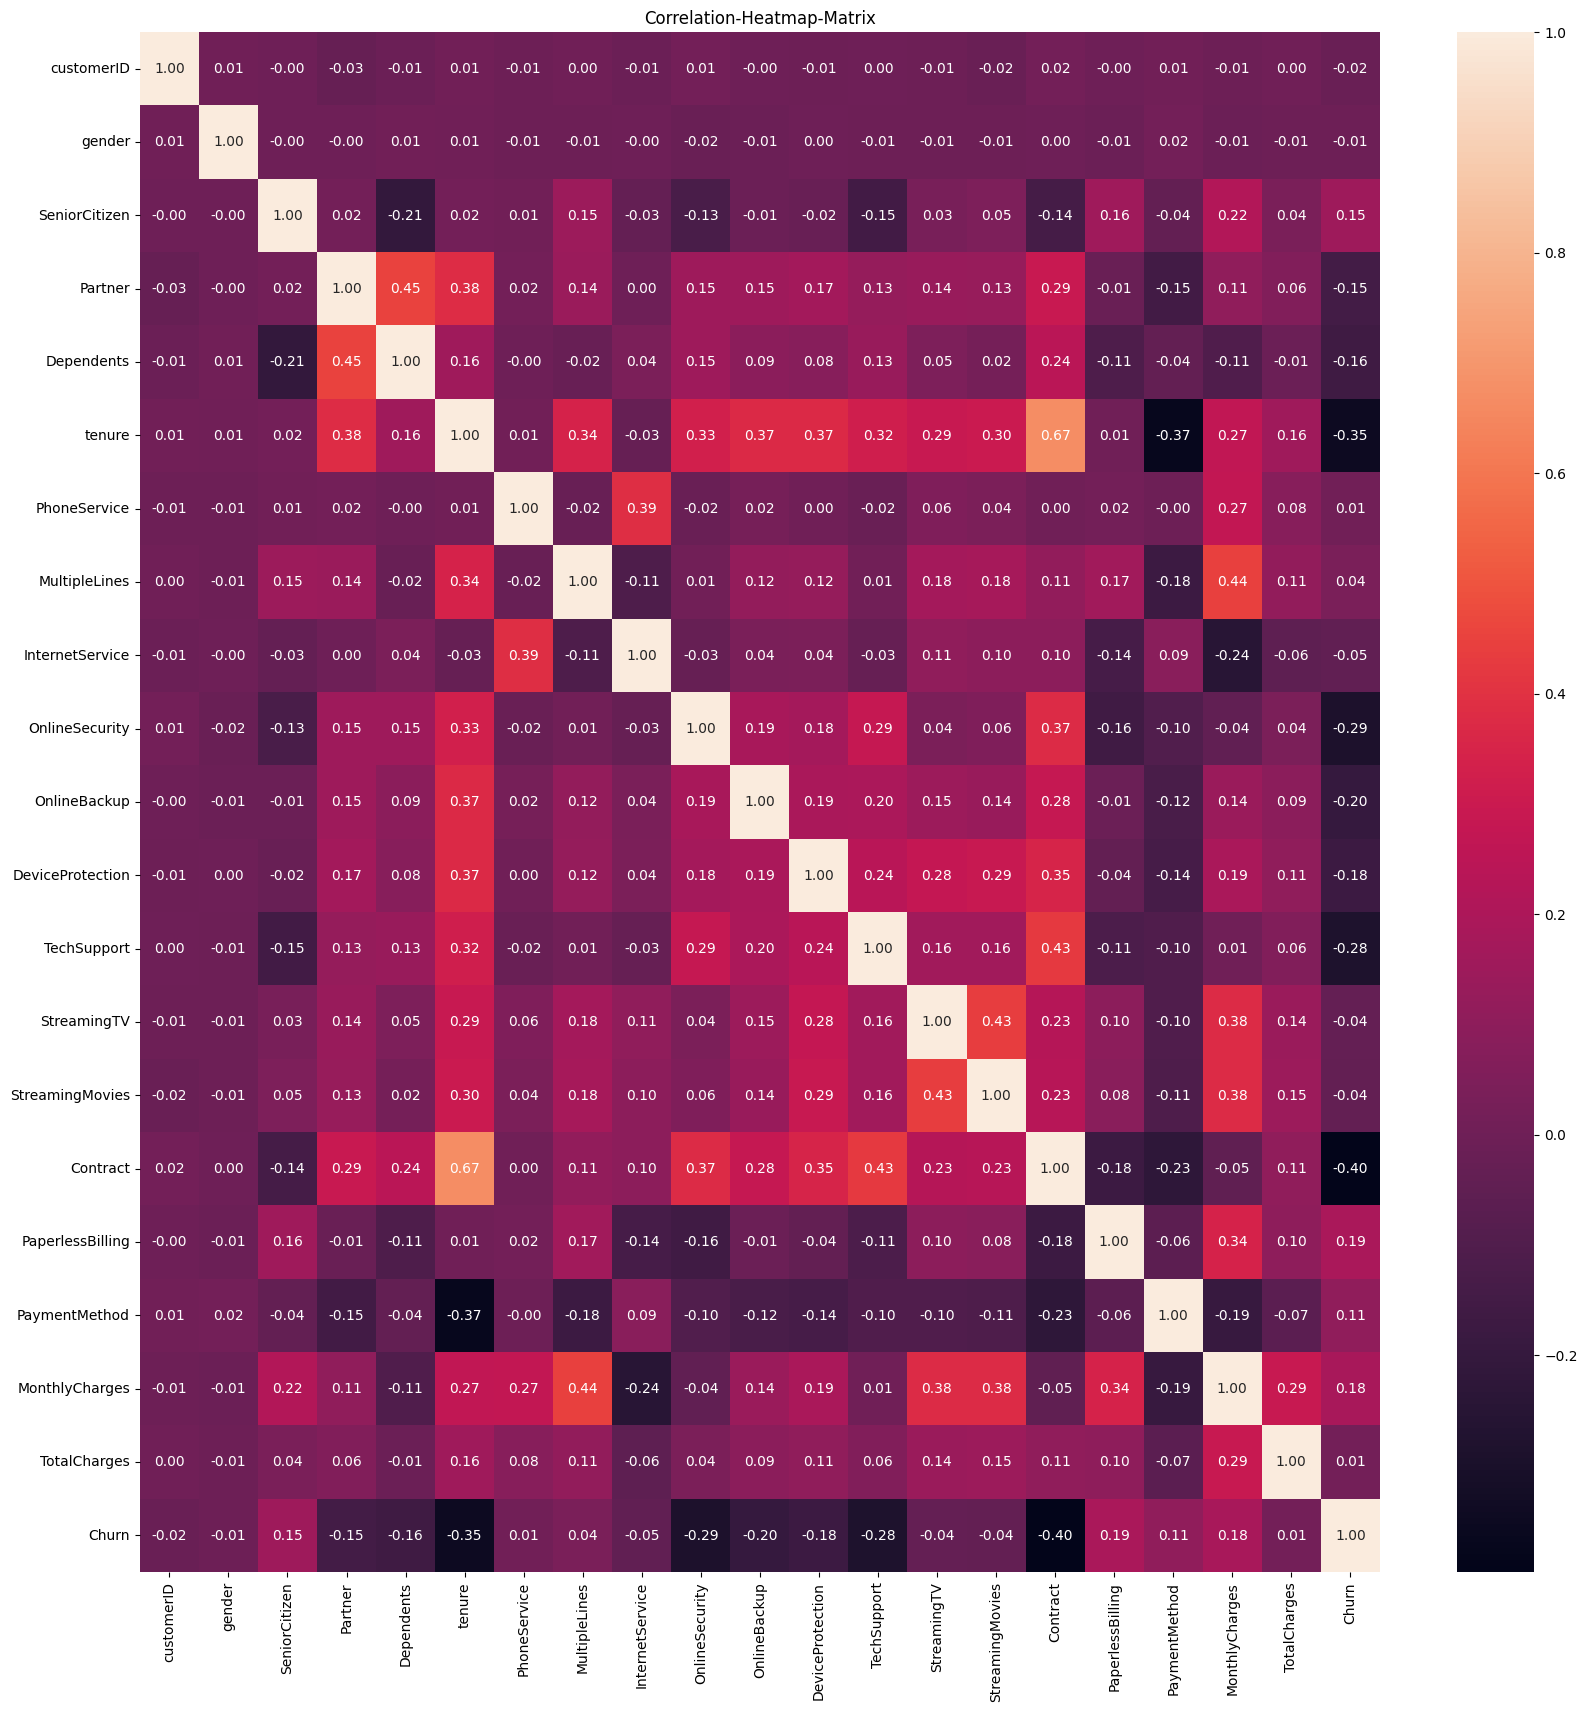

In [33]:
# correlation heatmap Matrix :
plt.figure(figsize=(20,20))
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f")
plt.title("Correlation-Heatmap-Matrix")
plt.show()

In [34]:
# Extract the most important Numerical Features:

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="Churn").select_dtypes("number").fillna(0),data["Churn"])

SelectKBest(k=5)

In [35]:
print(["{:10f}".format(p) for p in  fs.pvalues_])

['  0.143176', '  0.469905', '  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.316315', '  0.001409', '  0.000072', '  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.002137', '  0.001234', '  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.224381']


In [36]:
print(["{:10f}".format(p) for p in fs.scores_])


['  2.143970', '  0.522257', '164.041424', '163.060036', '195.149314', '997.268010', '  1.004266', ' 10.201712', ' 15.782320', '643.162019', '279.877370', '230.744618', '610.610024', '  9.434674', ' 10.447463', '1315.088872', '268.985218', ' 81.641664', '245.410904', '  1.476390']


In [37]:
featurs_values=pd.DataFrame(fs.pvalues_)
features_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="Churn").select_dtypes("number").fillna(0).columns)


In [38]:
feature_score=pd.concat([featurs_values,features_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

pvalues        score             input
0    1.431758e-01     2.143970        customerID
1    4.699045e-01     0.522257            gender
2    3.839860e-37   164.041424     SeniorCitizen
3    6.220731e-37   163.060036           Partner
4    9.140433e-44   195.149314        Dependents
5   7.999058e-205   997.268010            tenure
6    3.163148e-01     1.004266      PhoneService
7    1.409286e-03    10.201712     MultipleLines
8    7.177245e-05    15.782320   InternetService
9   7.417493e-136   643.162019    OnlineSecurity
10   1.223404e-61   279.877370      OnlineBackup
11   2.651265e-51   230.744618  DeviceProtection
12  2.351115e-129   610.610024       TechSupport
13   2.137335e-03     9.434674       StreamingTV
14   1.233835e-03    10.447463   StreamingMovies
15  3.666675e-264  1315.088872          Contract
16   2.356554e-59   268.985218  PaperlessBilling
17   2.075101e-19    81.641664     PaymentMethod
18   2.138155e-54   245.410904    MonthlyCharges
19   2.243809e-01     1.476390      TotalCharges

In [39]:
# Extract the most important Categorical Features :
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="Churn").select_dtypes("number").fillna(0),data["Churn"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="Churn").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

PhoneService        0.000000
MultipleLines       0.000000
gender              0.000360
customerID          0.004885
Partner             0.014023
SeniorCitizen       0.014108
Dependents          0.014183
PaperlessBilling    0.019053
StreamingTV         0.028334
TotalCharges        0.034317
DeviceProtection    0.034762
StreamingMovies     0.036552
MonthlyCharges      0.046066
OnlineBackup        0.046645
PaymentMethod       0.047719
InternetService     0.051157
TechSupport         0.062147
OnlineSecurity      0.064080
tenure              0.075339
Contract            0.105201
dtype: float64

<Axes: ylabel='SeniorCitizen'>

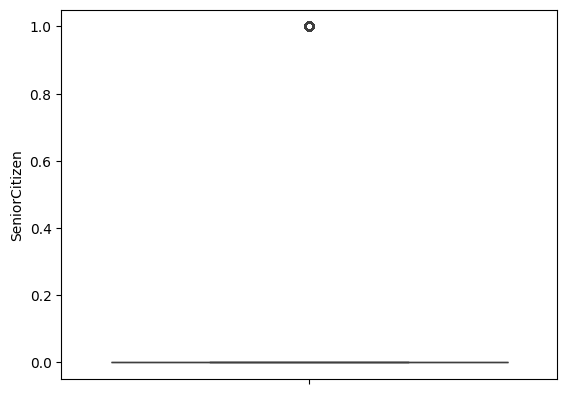

In [40]:
# Handling the outliers : 
# there are ouliers in SeniorCitizen ,tenure , MonthlyCharges

#1- Detect the outliers by using the boxplot to see if there the outliers :

sns.boxplot(data["SeniorCitizen"]) #from out of thes cell we found there outlier in this feature
   


<Axes: xlabel='SeniorCitizen'>

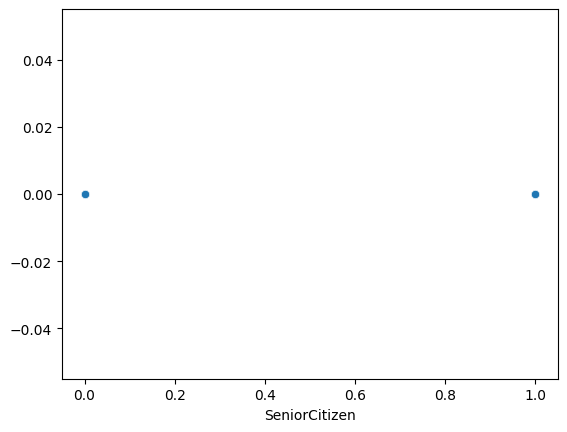

In [41]:
#2- by using the scatterplot:
sns.scatterplot(x=data["SeniorCitizen"],y=np.zeros_like(data["SeniorCitizen"]))

<Axes: ylabel='MonthlyCharges'>

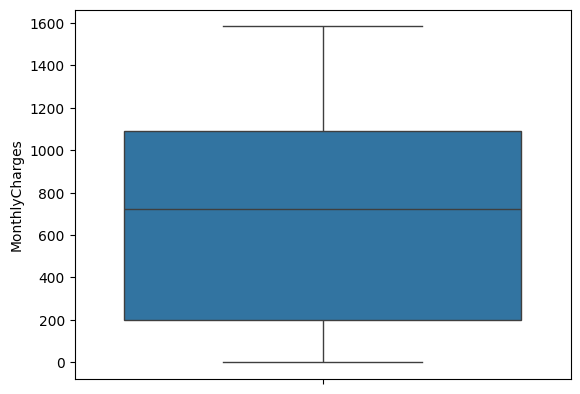

In [42]:
#1-by using boxplot:
sns.boxplot(data["MonthlyCharges"])

<Axes: xlabel='MonthlyCharges'>

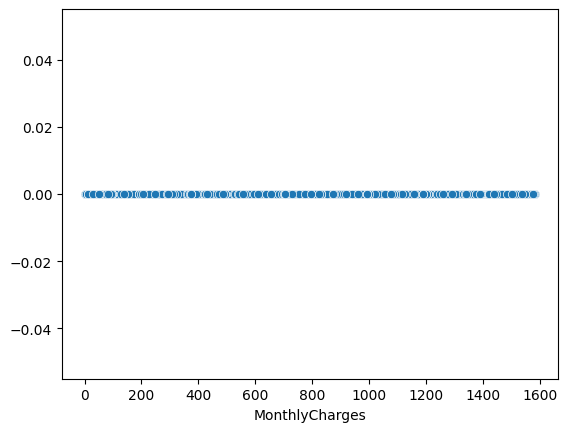

In [45]:
#2- by using the scatterplot:
sns.scatterplot(x=data["MonthlyCharges"],y=np.zeros_like(data["MonthlyCharges"]))

<Axes: ylabel='tenure'>

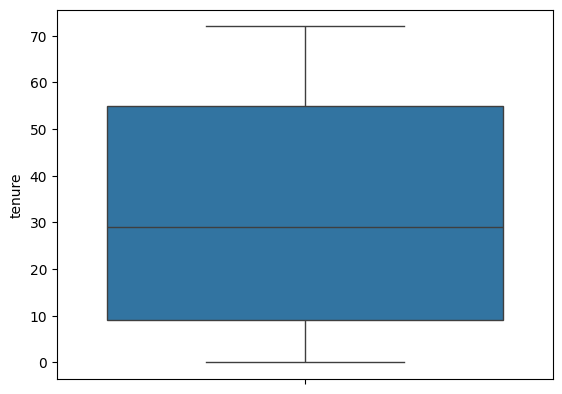

In [46]:
#1-by using boxplot:
sns.boxplot(data["tenure"])

<Axes: xlabel='tenure'>

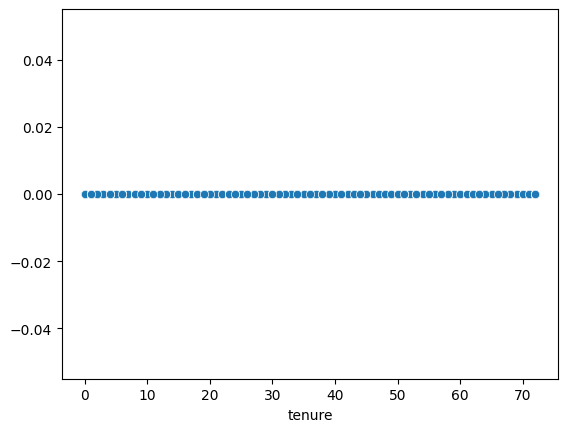

In [47]:
#2- by using the scatterplot:
sns.scatterplot(x=data["tenure"],y=np.zeros_like(data["tenure"]))

In [48]:
# Handle the outliers  by cal: on the SeniorCitizen feature:
#calc Q1,Q2,Q3,IQR and detect the outliers:
#calc the lower & upper limits :

Q1_SeniorCitizen,Q3_SeniorCitizen=data["SeniorCitizen"].quantile([0.25,0.75])
iqr=Q3_SeniorCitizen-Q1_SeniorCitizen
low_limit=Q1_SeniorCitizen-1.5*iqr
upper_limit=Q3_SeniorCitizen+1.5*iqr
outlier=[]
for x in data["SeniorCitizen"]: 
    if ((x> upper_limit) or (x<low_limit)): 
         outlier.append(x)
print(f"Q1_SeniorCitizen --->>> {Q1_SeniorCitizen} \n Q3_SeniorCitizen ---->>> {Q3_SeniorCitizen} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")


Q1_SeniorCitizen --->>> 0.0 
 Q3_SeniorCitizen ---->>> 0.0 
 iqr--->>0.0
 low_limit--->>>0.0 
  upper_limit--->>> 0.0 
 outlier---->>> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

upper_limit :  1.267981629267921
lower_limit :  -0.9436880043921578
Mean Value :  0.1621468124378816
1st Standard Deviation :  0.3686116056100131


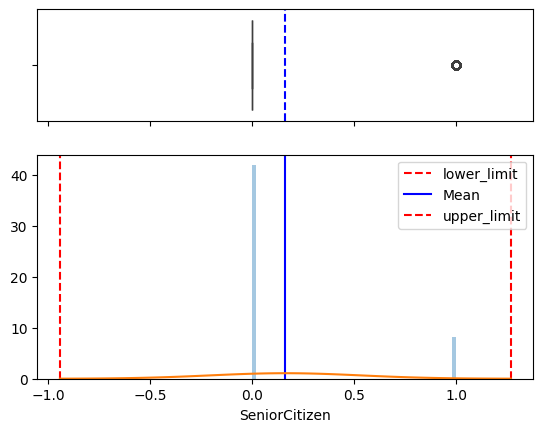

In [49]:
#Another way to calculate outlier:-


from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.SeniorCitizen.mean()
std = data.SeniorCitizen.std()
median = data.SeniorCitizen.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["SeniorCitizen"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["SeniorCitizen"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
#print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [50]:
# Handle the missing Values:
#1-check the missing values:

data.isnull().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [51]:
# fill the null values 

# Load your dataset into a pandas dataframe
df = data

# Fill null values in numeric columns with the median of the column
numeric_cols = df.select_dtypes("number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill null values in object columns with the mode of the column
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna(df[object_cols].mode())


In [52]:
data.isna().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [53]:
x=data.drop(columns="Churn",axis=1)
y=data["Churn"]
print(np.shape(x),"\n",np.shape(y))
print("*"*100)
print(x,y)

(7043, 20) 
 (7043,)
****************************************************************************************************
      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneSe

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
print(len(x_train),len(x_test),len(y_train),len(y_test))

5634 1409 5634 1409


In [55]:
model=RandomForestClassifier(random_state=42,n_estimators=100,max_depth=5,n_jobs=-1)
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)>

In [56]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [57]:
y_predict=model.predict(x_test)
y_predict[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
print(f"accuracy ---->>> {model.score(x_test,y_test)*100:0.2f}%")

accuracy ---->>> 79.84%


In [59]:
# improve the model accuracy :
np.random.seed()
for i in range(10,101,10):
    print(f"trying accuracy model{i}n_estimators")
    model1=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"accuracy={model1.score(x_test,y_test)*100:0.2f}%")

trying accuracy model10n_estimators
accuracy=77.08%
trying accuracy model20n_estimators
accuracy=78.64%
trying accuracy model30n_estimators
accuracy=78.00%
trying accuracy model40n_estimators
accuracy=78.99%
trying accuracy model50n_estimators
accuracy=79.06%
trying accuracy model60n_estimators
accuracy=78.07%
trying accuracy model70n_estimators
accuracy=79.13%
trying accuracy model80n_estimators
accuracy=79.28%
trying accuracy model90n_estimators
accuracy=78.00%
trying accuracy model100n_estimators
accuracy=79.28%


In [60]:
# Hypothesis  & Confusion_matrix :
cm=metrics.confusion_matrix(y_test,y_predict)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[0,1],cm[1,0]
print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("*"*100)
print(f" precsion_score :{metrics.precision_score(y_test,y_predict)*100:0.2f}%")
print(f"recall_score:{metrics.recall_score(y_test,y_predict)*100:0.2f}%")

print("*"*100)

print(f" precsion_score :{metrics.precision_score(y_test,y_predict)*100:0.2f}%")
print(f"recall_score:{metrics.recall_score(y_test,y_predict)*100:0.2f}%")

True positve prediction : 154
True Negative predicion : 971
False positve prediction: 64
False Negative prediction: 220
****************************************************************************************************
 precsion_score :70.64%
recall_score:41.18%
****************************************************************************************************
 precsion_score :70.64%
recall_score:41.18%


In [61]:
from sklearn import tree


In [62]:
model1=tree.DecisionTreeClassifier(random_state=42,max_depth=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [63]:
model1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [64]:
y_pred=model1.predict(x_test)
y_pred[:10]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [65]:
print(f"model1_accuracy ----- >>>{model1.score(x_test,y_test)*100:0.2f}%")

model1_accuracy ----- >>>78.07%


In [66]:
# explain the prediction:
tree_represention=tree.export_text(model1)
print(tree_represention)

|--- feature_15 <= 0.50
|   |--- feature_9 <= 0.50
|   |   |--- feature_5 <= 10.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_18 <= 467.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_18 >  467.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_5 >  10.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_18 <= 654.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_18 >  654.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_17 <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_17 >  1.50
|   |   |   |   |   |--- class: 1
|   |--- feature_9 >  0.50
|   |   |--- feature_18 <= 1121.50
|   |   |   |--- feature_5 <= 1.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |  

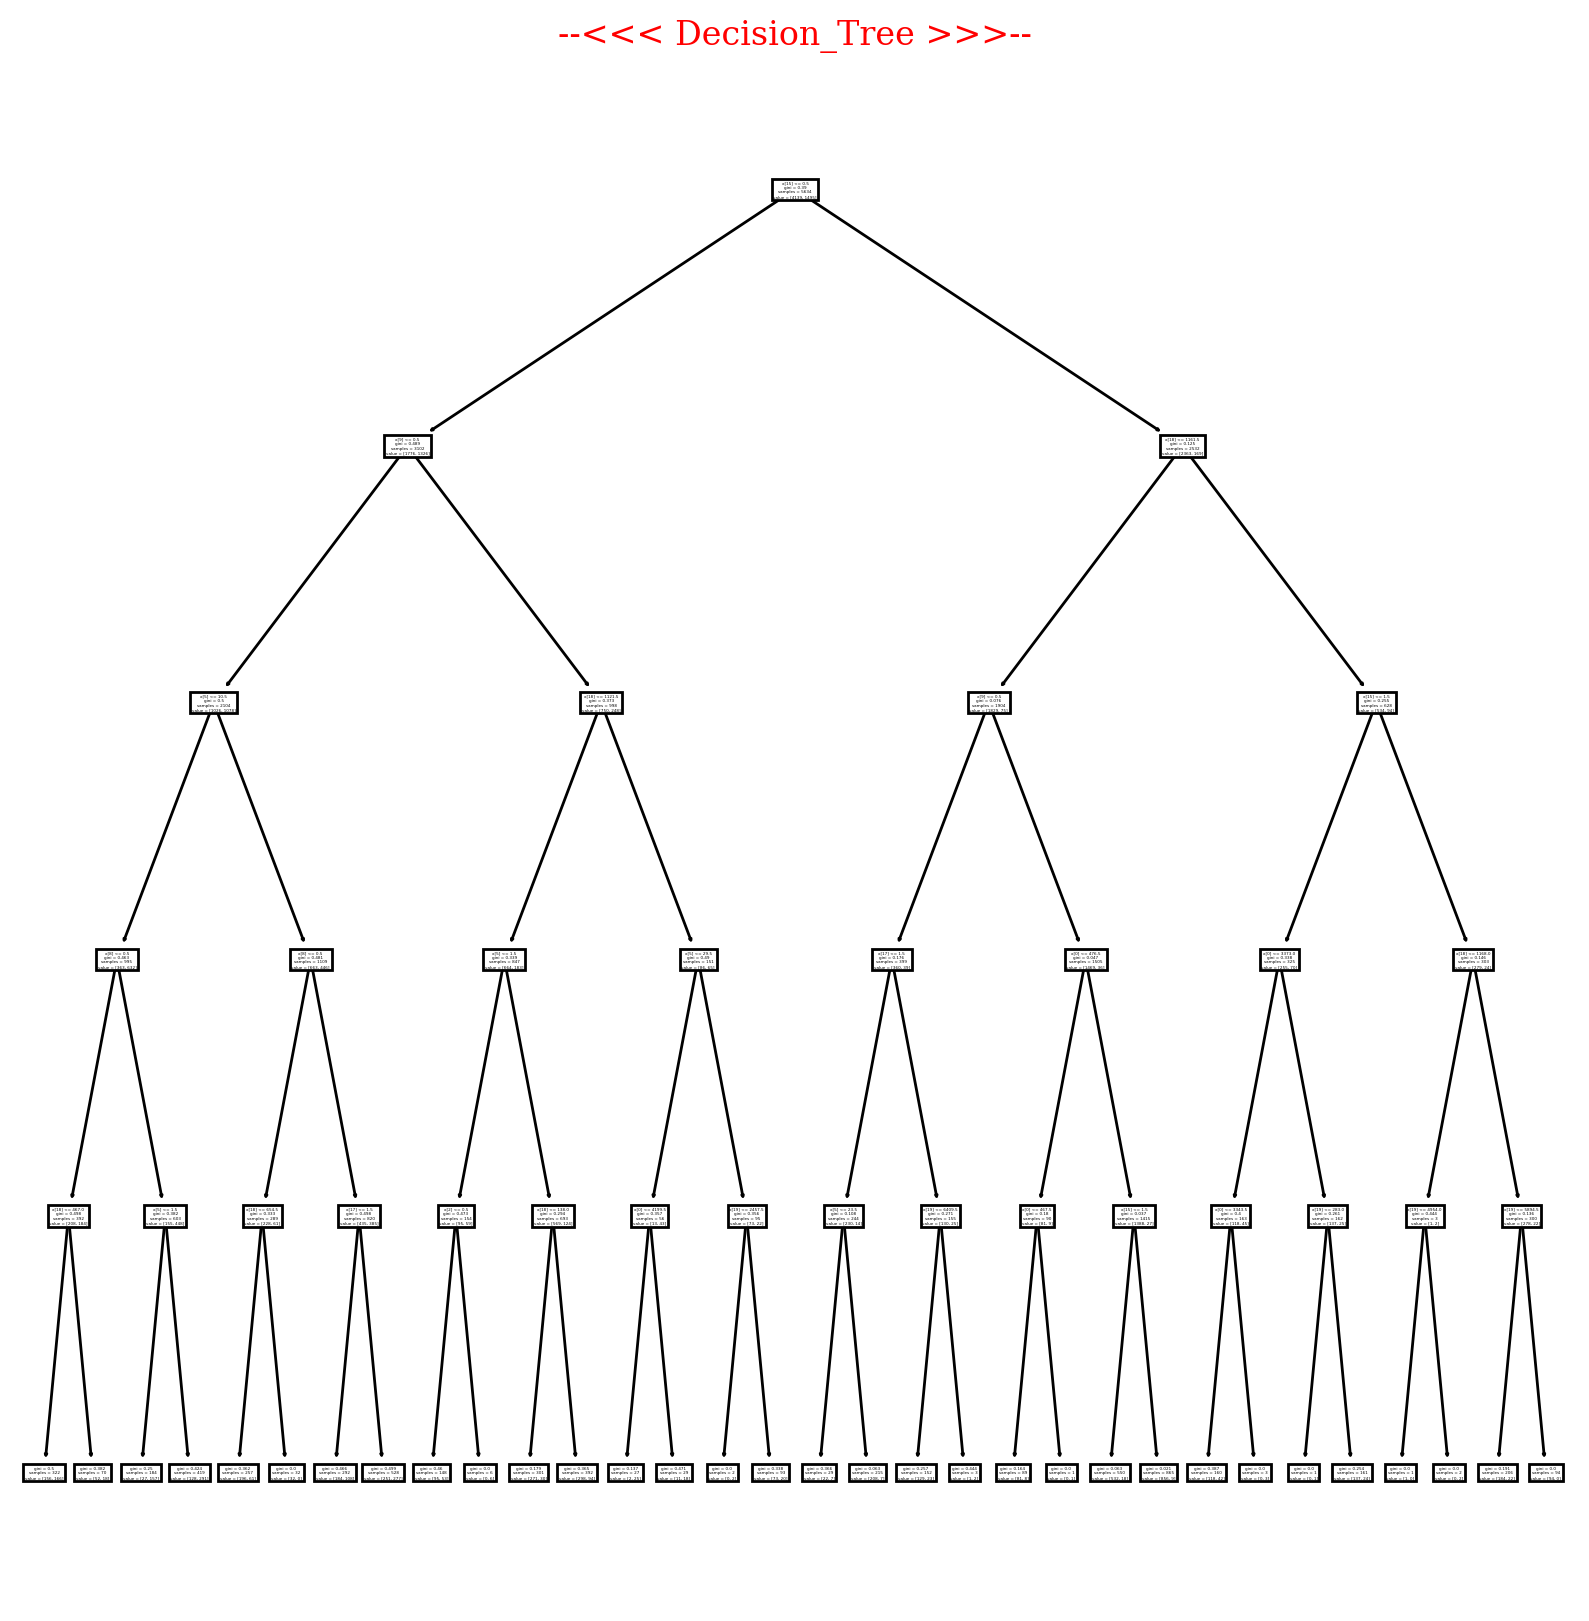

In [67]:
#plot the tree :

# if i want to plot tree:

f={"color":"r","family":"serif","size":12}
plt.figure(figsize=(10,10),dpi=200) # dpi => كثافة البكسل ووضوح الكلام
tree.plot_tree(model1)
plt.title("--<<< Decision_Tree >>>--",fontdict=f)
plt.show()

In [68]:
# Hypothesis  & Confusion_matrix :
cm=metrics.confusion_matrix(y_test,y_pred)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[0,1],cm[1,0]
print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("*"*100)
print(f" precsion_score :{metrics.precision_score(y_test,y_pred)*100:0.2f}%")
print(f"recall_score:{metrics.recall_score(y_test,y_pred)*100:0.2f}%")

print("*"*100)

print(f" precsion_score :{metrics.precision_score(y_test,y_pred)*100:0.2f}%")
print(f"recall_score:{metrics.recall_score(y_test,y_pred)*100:0.2f}%")

True positve prediction : 225
True Negative predicion : 875
False positve prediction: 160
False Negative prediction: 149
****************************************************************************************************
 precsion_score :58.44%
recall_score:60.16%
****************************************************************************************************
 precsion_score :58.44%
recall_score:60.16%


In [44]:
print("This project is Don by  Devloper ---->>> AbdalRahman Gameel Ahmed Hebishy")

This project is Don by  Devloper ---->>> AbdalRahman Gameel Ahmed Hebishy
